# Loan Prediction Dataset

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

loan-prediction-dataset.ipynb train_u6lujuX_CVtuZ9i.csv
test_Y3wMUE5_7gLdaTN.csv


In [231]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [232]:
train.shape

(614, 13)

In [233]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Exploratory Data Analysis

#### Target

Text(0.5,1,'Loan Approval Status')

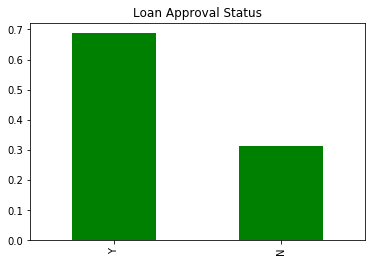

In [234]:
# This is have loans been approved or not Y/N
train['Loan_Status'].value_counts(normalize=True).plot(kind='bar', color='green').set_title('Loan Approval Status')

#### Features

In [235]:
# This is just an ID column and holds no relvant information
train['Loan_ID'].nunique()

614

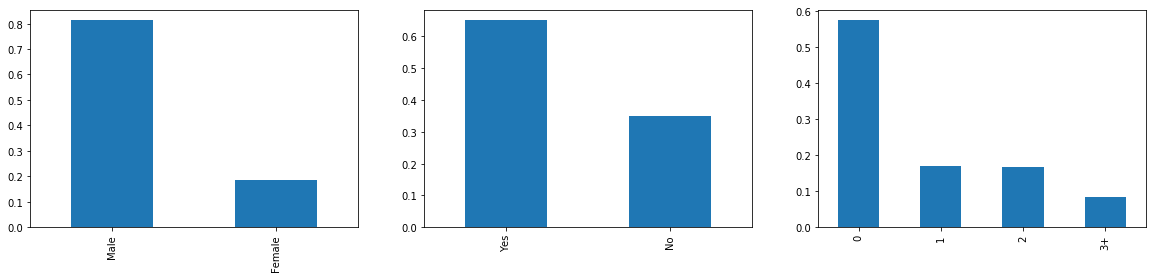

In [236]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
train['Gender'].value_counts(normalize=True).plot(kind='bar', ax=ax[0])
train['Married'].value_counts(normalize=True).plot(kind='bar', ax=ax[1])
train['Dependents'].value_counts(normalize=True).plot(kind='bar', ax=ax[2])

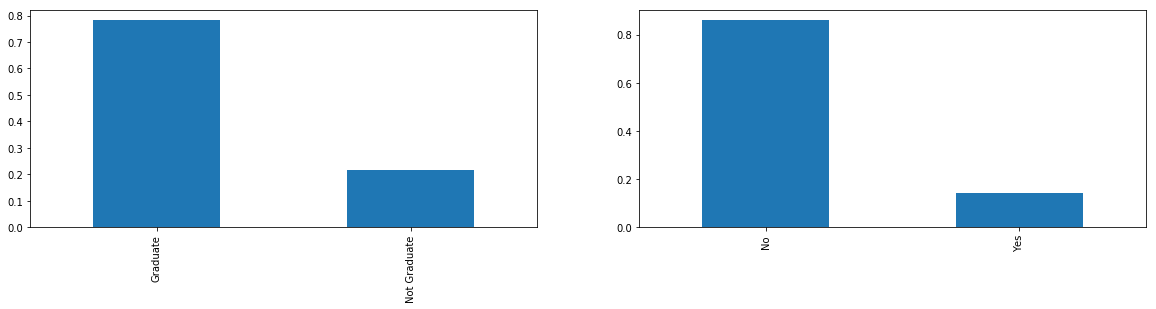

In [237]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
train['Education'].value_counts(normalize=True).plot(kind='bar', ax=ax[0])
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar', ax=ax[1])

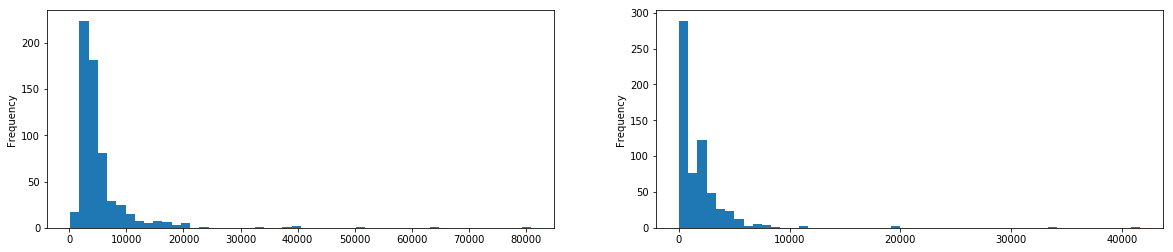

In [238]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
train['ApplicantIncome'].plot(kind='hist', bins=50, ax=ax[0])
train['CoapplicantIncome'].plot(kind='hist', bins=50, ax=ax[1])

* These two features are highly right skewed

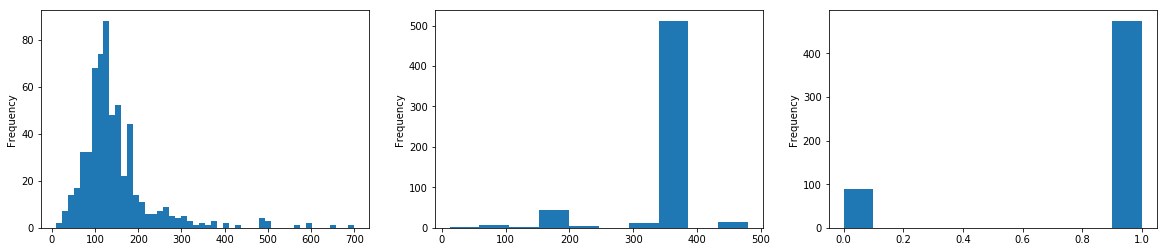

In [239]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
train['LoanAmount'].plot(kind='hist', ax=ax[0], bins=50)
train['Loan_Amount_Term'].plot(kind='hist', ax=ax[1])
train['Credit_History'].plot(kind='hist', ax=ax[2])

* The Loan Ammount is also highly skewed

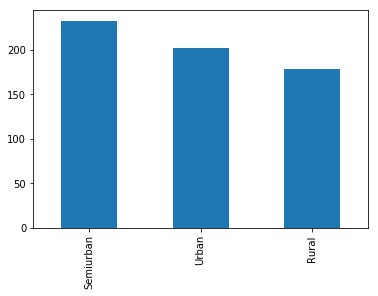

In [240]:
train['Property_Area'].value_counts().plot(kind='bar')

## Missing Value Treatment

In [241]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [242]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [243]:
# Will change the Nan values in gender to unknown
train['Gender'].fillna('unknown', inplace=True)
train['Gender'].value_counts()

Male       489
Female     112
unknown     13
Name: Gender, dtype: int64

In [244]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [245]:
# For the married column I will assume they are not married
train['Married'].fillna('No', inplace=True)

In [246]:
# I will assume the Nan in dependants mean dont have any
train['Dependents'].fillna(0, inplace=True)

In [247]:
# Let's take a look at the self employed null rows
train[train['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [248]:
# Im going to assume these are all not self-employed
train['Self_Employed'].fillna('No', inplace=True)

In [249]:
# Lets look at Loan Ammount unknown
train[train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [250]:
# I will assume all the loan terms are 360
train['Loan_Amount_Term'].fillna(360.0, inplace=True)

In [251]:
train['Credit_History'].fillna(0.0, inplace=True)

In [252]:
train.dropna(inplace=True)

In [253]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Preprocessing

In [254]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [255]:
# Get Dummies
X = pd.get_dummies(train.drop(['Loan_ID', 'Loan_Status'], axis=1), drop_first=True)
X.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_unknown,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,1,0,0,0,1,0,0,1


In [258]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [291]:
train['Loan_Status'] = train['Loan_Status'].map(lambda x: 1 if x == 'Y' else 0)

In [292]:
y = train['Loan_Status']

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [294]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(444, 16)
(444,)
(148, 16)
(148,)


## Modelling

Models to try:
* Logistic Regression
* Random Forest
* SVM
* Naive Bayes

In [ ]:
# ROC Curve Plotter
def roc_curve_plotter(y_test, y_hat_pp):
    fpr, tpr, _ = roc_curve(y_test, y_hat_pp[:,1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=[8,8])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic: loan approved', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

#### Logistic Regression

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

------------------------------------------
Logistic Regression
Training Score:  0.7792792792792793
Cross Validation Score:  [0.76404494 0.82022472 0.73033708 0.74157303 0.77272727]
Testing Score:  0.7162162162162162
------------------------------------------
               predicted approved  predicted rejected
loan approved                  20                  31
loan rejected                  11                  86
------------------------------------------


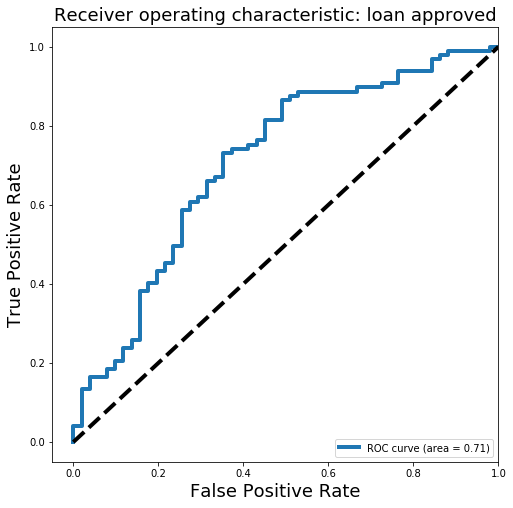

In [337]:
lr = LogisticRegression(solver='lbfgs')

print('-'*42)
print('Logistic Regression')

def classification_report(estimator, X_train, X_test, y_train, y_test):

    estimator.fit(X_train, y_train)
    print('Training Score: ',estimator.score(X_train, y_train))
    print('Cross Validation Score: ', cross_val_score(estimator, X_train, y_train, cv=5))
    print('Testing Score: ', estimator.score(X_test, y_test))

    print('-'*42)
    y_hat = estimator.predict(X_test)
    y_hat_pp = estimator.predict_proba(X_test)

    confusion = pd.DataFrame(np.array(confusion_matrix(y_test, y_hat)),
                             index=['loan approved', 'loan rejected'],
                             columns=['predicted approved','predicted rejected'])

    print(confusion)
    print('-'*42)
    roc_curve_plotter(y_test, y_hat_pp)
    
classification_report(lr, X_train, X_test, y_train, y_test)

#### Random Forest Classification

In [320]:
from sklearn.ensemble import RandomForestClassifier

------------------------------------------
Random Forest Classifier
Training Score:  0.8581081081081081
Cross Validation Score:  [0.7752809  0.78651685 0.71910112 0.74157303 0.76136364]
Testing Score:  0.7297297297297297
------------------------------------------
               predicted approved  predicted rejected
loan approved                  22                  29
loan rejected                  11                  86
------------------------------------------


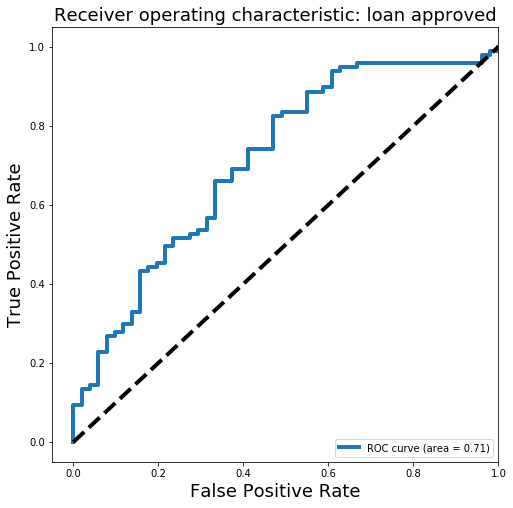

In [338]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=7)

print('-'*42)
print('Random Forest Classifier')

classification_report(rfc, X_train, X_test, y_train, y_test)

#### SVM

In [335]:
from sklearn.svm import SVC

In [342]:
svm = SVC(kernel = 'linear')

print('-'*42)
print('Support Vector Machiene')

svm.fit(X_train, y_train)
print('Training Score: ', svm.score(X_train, y_train))
print('Cross Validation Score: ', cross_val_score(svm, X_train, y_train, cv=5))
print('Testing Score: ', svm.score(X_test, y_test))

------------------------------------------
Support Vector Machiene
Training Score:  0.7837837837837838
Cross Validation Score:  [0.7752809  0.80898876 0.76404494 0.7752809  0.79545455]
Testing Score:  0.7364864864864865


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

print('-'*42)
print('Gaussian Naive Bayes')

classification_report()